## Skydiver Problem

An **80 kg person** jumps (with velocity **Vₚ = (Vₓ, Vᵧ)**) out of an airplane **horizontally**.

- **Airplane speed**: 50 m/s  
- **Terminal velocity**: Vₜ = -55 m/s  

---

### Goal:

- **Find**: Vₚ at all times  
- **Determine**: How long it takes until the skydiver gets within **1% of Vₜ**


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [7]:
t=np.linspace(0,20,100)
m= 80
g= 9.8
vt= -55 
b= m*g/(vt**2)
v0x, v0y= 50, 0

The equations of motion for the skydiver are:

$$
\frac{dv_x}{dt} = -\frac{b}{m} \sqrt{v_x^2 + v_y^2} \cdot v_x
$$

$$
\frac{dv_y}{dt} = -g - \frac{b}{m} \sqrt{v_x^2 + v_y^2} \cdot v_y
$$


In [14]:
def dvp_dt(vp,t,g,m,b):
    vx= vp[0]
    vy= vp[1]
    return [
        -b/m*np.sqrt(vx**2+vy**2)*vx,
        -g - b/m*np.sqrt(vx**2+vy**2)*vy
    ]

In [17]:
V_sol= odeint(dvp_dt, y0=[v0x,v0y] , t=t, args=(g,m,b))
print(V_sol.T)

[[ 50.          48.41523885  46.92546222  45.51995132  44.18929785
   42.92522478  41.72043964  40.56851469  39.46378623  38.40127062
   37.37659238  36.38592189  35.42592046  34.49369113  33.58673403
   32.70290554  31.84038046  30.99761692  30.17332383  29.3664305
   28.57605876  27.80149687  27.04217597  26.29764836  25.56756796
   24.8516727   24.14976871  23.46171656  22.78741884  22.12680966
   21.47984539  20.84649681  20.22674266  19.62056387  19.02793912
   18.44884141  17.88323495  17.3310732   16.79229717  16.26683441
   15.7545984   15.25548823  14.7693887   14.29617061  13.83569124
   13.38779503  12.95231434  12.52907032  12.11787382  11.71852643
   11.33082142  10.95454468  10.58947578  10.23538885   9.89205353
    9.55923586   9.23669908   8.92420444   8.62151197   8.3283811
    8.04457136   7.76984294   7.50395721   7.24667724   6.99776822
    6.75699787   6.52413676   6.29895867   6.08124082   5.87076415
    5.66731348   5.47067771   5.28064997   5.0970277    4.919612

Text(0.5, 1.0, ' Velocity vs T')

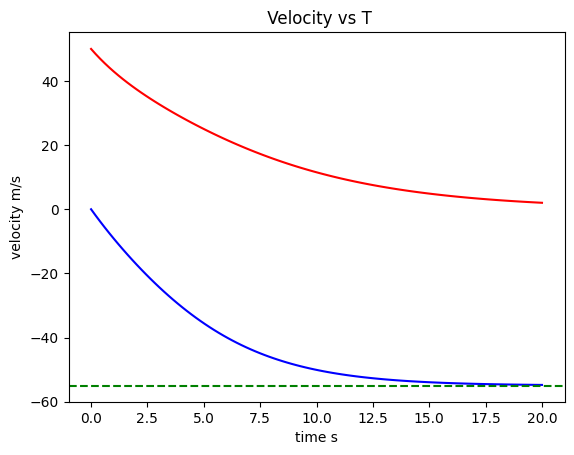

In [30]:
vx= V_sol.T[0]
vy= V_sol.T[1]
plt.plot(t,vx,'r',label='Vx')
plt.plot(t,vy,'b',label='Vy')
plt.axhline(vt,color='g',linestyle='--', label='Vt')

plt.xlabel('time s')
plt.ylabel('velocity m/s')
plt.title(' Velocity vs T')



In [31]:
ind = np.abs(vt-vy) / abs(vt) < 0.01

In [32]:
t[ind]

array([17.17171717, 17.37373737, 17.57575758, 17.77777778, 17.97979798,
       18.18181818, 18.38383838, 18.58585859, 18.78787879, 18.98989899,
       19.19191919, 19.39393939, 19.5959596 , 19.7979798 , 20.        ])